# location based Recommendation system
1. used kmean clustering
2. yelp dataset from kaggle
3. gdal - used for data transmission of geograpical data in python libraris
4. geopandas - it add map support to pandas object
5. descartes - it help in making interactive catesian plane
6. folium - python package built in javascript,used for visualzing the geograpical data and hovering effect.
7.plottly_express - it is better version of matplotlib(static visualization) ,it make more interactive visualization.
8. rtree - it is a spatial data structure used for organizing and indexing multi-dimensional data, particularly in applications involving spatial searching, such as geographic information systems (GIS), computer vision, and machine learning.


In [1]:
# installing libraries
!apt install gdal_bin python-gdal python3_gdal
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Unable to locate package gdal_bin
E: Package 'python-gdal' has no installation candidate
E: Unable to locate package python3_gdal
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jam

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
! wget https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
! unzip yelp_academic_dataset_business.zip

--2025-03-25 13:28:45--  https://www.dropbox.com/s/3x1w789mmuae3ao/yelp_academic_dataset_business.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/j8o6zehosa4r8weux3tqp/yelp_academic_dataset_business.zip?rlkey=3w7wxchb1nm8itx8yq7bzrgxz [following]
--2025-03-25 13:28:45--  https://www.dropbox.com/scl/fi/j8o6zehosa4r8weux3tqp/yelp_academic_dataset_business.zip?rlkey=3w7wxchb1nm8itx8yq7bzrgxz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5ccda86bdda584457492257fb7.dl.dropboxusercontent.com/cd/0/inline/CmiizdbMioXHBttgYIhINTZl6AFpF2KFiH8nMDjGdDapIjcAW2pI3e8tbIv8TS8r76qdFY3OWqj_Y6fKLbRiFN2qRI9NIhisf1XAEBoMNKbUpUih0aYy88opM-zP6pz5znjBFvjIXDM3uNviWsQGhY3R/file# [following]
--2025-03-25 13:28:46--  https://uc

In [4]:
df = pd.read_json('yelp_academic_dataset_business.json',lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


In [5]:
df.shape

(192609, 14)

In [6]:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None,False
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",True
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",True


In [7]:
df_restaurants = df.loc[df.Restaurants==True]
df_restaurants.head()
small_sample = df_restaurants[0:20]
small_sample =small_sample.drop(['attributes','categories','hours','Restaurants','business_id'],axis=1)

small_sample = small_sample.reset_index(drop=True)
# small_sample.to_json('sample_final.json')


In [8]:
v = small_sample
v.shape

(20, 10)

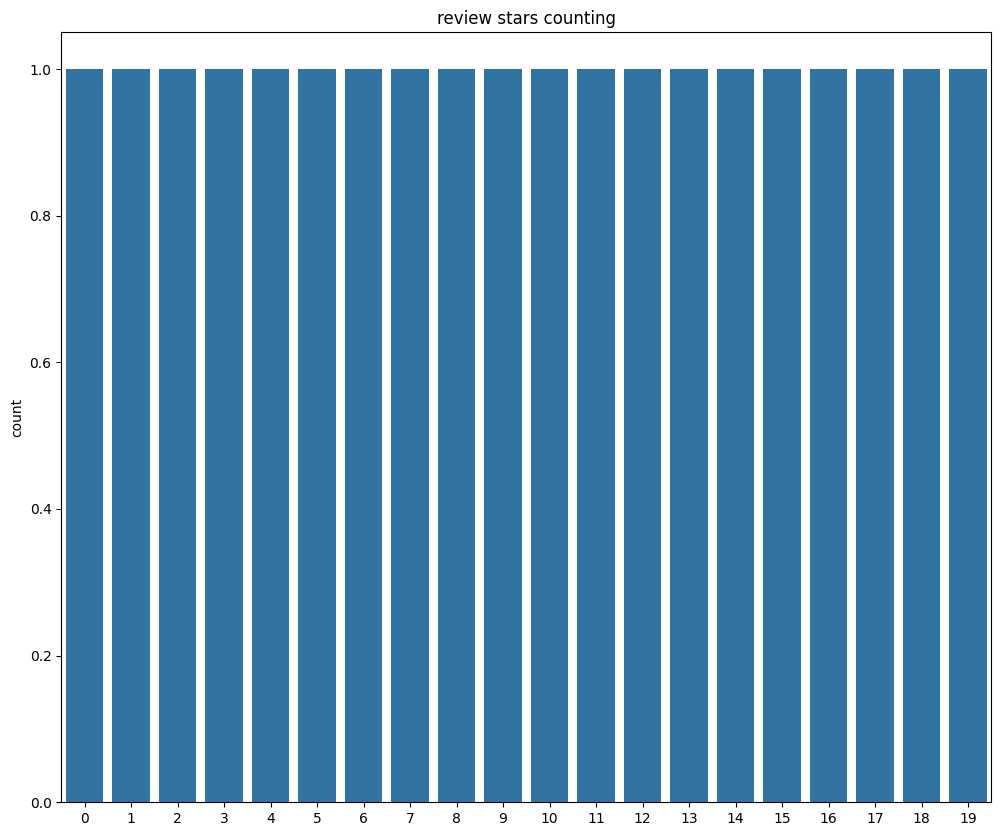

In [9]:
fig,ax = plt.subplots(figsize=(12,10))
sns.countplot(small_sample['stars'], ax=ax)
plt.title('review stars counting')
# plt.savefig('starcount.png')
plt.show()

In [10]:
top_restaurants = small_sample.sort_values(by=['review_count','stars'],ascending=False)
top_restaurants.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
19,Nee House Chinese Restaurant,"13843 N Tatum Blvd, Ste 15",Phoenix,AZ,85032,33.613020,-111.977036,3.5,269,1
14,Apteka,4606 Penn Ave,Pittsburgh,PA,15224,40.465694,-79.949324,4.5,242,1
6,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1
1,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1
0,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1


In [11]:
t_r = small_sample.sort_values(by=['review_count','stars'],ascending=False)

t_r = t_r.reset_index(drop=True)
t_r
# t_r.to_json('top_restaurants.json')

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,Nee House Chinese Restaurant,"13843 N Tatum Blvd, Ste 15",Phoenix,AZ,85032,33.613020,-111.977036,3.5,269,1
1,Apteka,4606 Penn Ave,Pittsburgh,PA,15224,40.465694,-79.949324,4.5,242,1
2,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,NV,89156,36.195615,-115.040529,4.5,184,1
3,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1
5,No. 1 Sushi Sushi,436 Market St,Pittsburgh,PA,15222,40.441062,-80.002126,4.5,106,1
6,Buk Chang Dong Soon Tofu,3085 Hurontario Street,Mississauga,ON,L5A,43.582262,-79.618858,4.0,103,1
7,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1
8,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0
9,Marathon Diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,PA,15231,40.496177,-80.246011,4.0,35,1


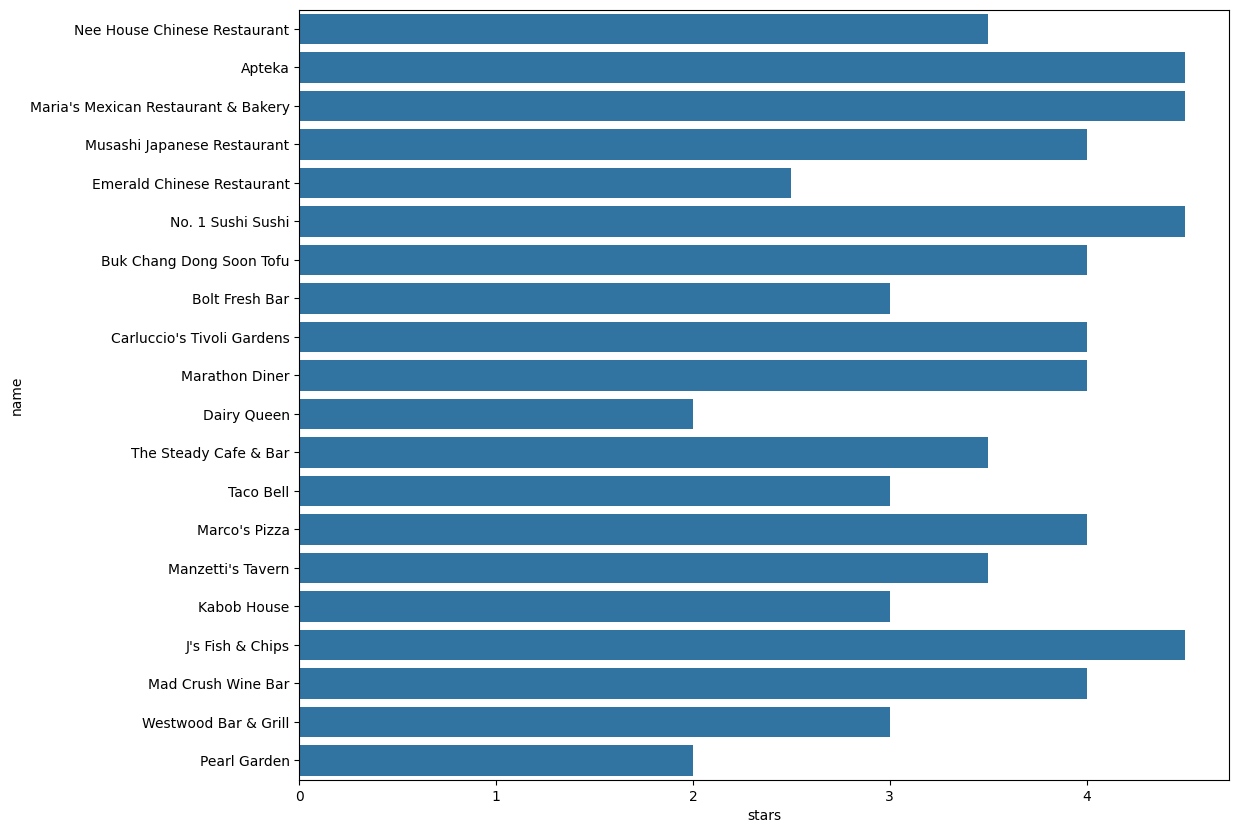

In [12]:
fig,ax = plt.subplots(figsize=(12,10))
sns.barplot(x='stars',y='name',data=t_r,ax= ax);
plt.show()


In [13]:
px.set_mapbox_access_token("pk.eyJ1IjoidmlyZW5kcmEyMyIsImEiOiJjbThsYmd5dHExNXQ0MmpzNXpwZ2U1Zmh1In0.WKDV1ghfFdkaqTtZQuAfnw")
px.scatter_mapbox(t_r,lat='latitude',lon='longitude',color='stars',size='review_count',size_max=30,zoom=5,width=1200,height=1000)


In [14]:
 Toronto = t_r[t_r.state == 'ON']
 px.scatter_mapbox(Toronto,lat='latitude',lon='longitude',color='stars',size='review_count',size_max=30,zoom=8,width=1200,height=1000)


# K Mean Clustering

1. if c1,c2,c3 are clusters ,then distortions of 1st cluster = (d[1,2]+d[1,3])/2
2. Interia - (d[1,2]^2+d[2,3]^2+d[3,1]^2)/3

In [15]:
coords = Toronto[['longitude','latitude']]
distortions=[]
K=range(1,5)
for k in K:
  kmeansModel = KMeans(n_clusters=k)
  kmeansModel =kmeansModel.fit(coords)
  distortions.append(kmeansModel.inertia_)


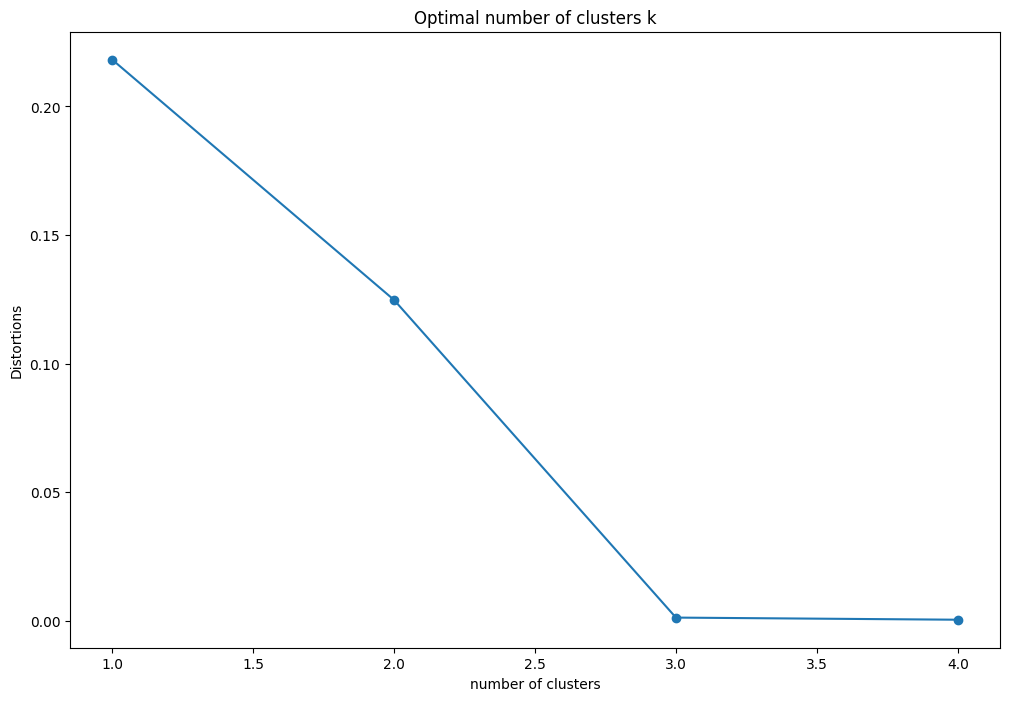

In [16]:
fig,ax = plt.subplots(figsize=(12,8))
plt.plot(K,distortions,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('Distortions')
plt.title('Optimal number of clusters k')
plt.show()

# Silhouette_score
-how much a point belong to its cluster as compare to other clusters .
-1<s<1,

 1) 1-well separated,Tight clusters

2)-1-overlapped cluster

In [17]:
from sklearn.metrics import silhouette_score
sil=[]
for k in range(2,5):
  kmeans = KMeans(n_clusters =k ).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords,labels,metric='euclidean'))

In [18]:
sil

[np.float64(0.5708049002941341),
 np.float64(0.7295548414697656),
 np.float64(0.4552964111026614)]

In [19]:
# Best k value is 3
kmeans =KMeans(n_clusters=3,init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k=3",silhouette_score(coords,y,metric ='euclidean'))


k=3 0.7295548414697656


In [20]:
Toronto['cluster'] = kmeans.predict(Toronto[['longitude','latitude']])
Toronto

<ipython-input-20-215f05fc40cb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,cluster
4,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,2
6,Buk Chang Dong Soon Tofu,3085 Hurontario Street,Mississauga,ON,L5A,43.582262,-79.618858,4.0,103,1,2
7,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,0
11,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,0
16,J's Fish & Chips,"17205 Leslie Street, Unit 2",Newmarket,ON,L3Y 8Y8,44.058765,-79.429115,4.5,12,1,1
17,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,0,0


In [21]:
px.scatter_mapbox(Toronto, lat='latitude', lon='longitude',color="cluster",size='review_count',
                  hover_data =['name','latitude','longitude'],zoom=12,width=1200,height=800)

# Location-Based Recommendation

In [22]:
top_restaurants_Toronto = Toronto.sort_values(by=['review_count','stars'],ascending=False)

top_restaurants_Toronto = top_restaurants_Toronto.reset_index(drop=True)
top_restaurants_Toronto

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,cluster
0,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,2
1,Buk Chang Dong Soon Tofu,3085 Hurontario Street,Mississauga,ON,L5A,43.582262,-79.618858,4.0,103,1,2
2,Bolt Fresh Bar,1170 Queen Street W,Toronto,ON,M6J 1J5,43.642889,-79.425429,3.0,57,1,0
3,The Steady Cafe & Bar,1051 Bloor Street W,Toronto,ON,M6H 1M4,43.660494,-79.432099,3.5,29,0,0
4,J's Fish & Chips,"17205 Leslie Street, Unit 2",Newmarket,ON,L3Y 8Y8,44.058765,-79.429115,4.5,12,1,1
5,Mad Crush Wine Bar,582 College Street,Toronto,ON,M6G 1B3,43.655420,-79.413352,4.0,9,0,0


In [23]:
def recommend(df,longitude,latitude):
  cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
  print(cluster)
 #  get best resturand in cluster
  return df[df['cluster']==cluster].iloc[0:2][['name','latitude','longitude']]


In [24]:
recommend(top_restaurants_Toronto,-115,36)

2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
0,Emerald Chinese Restaurant,43.605499,-79.652289
1,Buk Chang Dong Soon Tofu,43.582262,-79.618858
